<a id='intro'></a>
## Introduction

### Dataset Description 

> In this project we have two data sets about Gun usage in USA, the first data(Gun data == gun) is about every state in USA and number of permit to use guns, and the numbers and kinds of guns (guns, long guns) and the statues of it like (returned, rented, private, redumption and prepawn) that is used in that state, since Nov. 1998 to Septemper 2017. The other data set, we have diffrent facts - there are 65 differnt census measurement as value of Fact- not so related to the gun owning. however it provides us some facts are related and we will use them to anylysis of the first data for answering the questions too.


### Question(s) for Analysis
> 1.What census variable or fact value is most associated with high gun per capita per state? Ceusus data includes state as variable, . 

> 2.Which states have had the highest growth and the lowest growth in gun registrations?

> 3.What is the overall trend of gun purchases by year or by year and month?

census = Reading Data File US census 
gun = Reading Data File gun data
states = List of States

gun_state = Grouping Gun Data by State
total_guns_per_state = gun_state['totals'].sum()

guntotal_16= Calculating Gun Totals for 2016 
guntotal_10= Calculating Gun Totals for 2010

gun_total_both = Merging Gun Totals

result['Gun_Per_Capital_2016'] = Calculating Guns Per Capita
result['Gun_Per_Capital_2010'] = Calculating Guns Per Capita

gun_total_both = Merging Gun Totals

result = Merging Census Data


---

In [194]:
#   plan to use.
import pandas as pd
import numpy as np


<a id='wrangling'></a>
## Data Wrangling

> Upload the data, read it, and see the information of every data set. 

In [195]:
census = pd.read_csv('US_census.csv')
gun = pd.read_csv('gun-data.csv') 

In [196]:
census.head(2)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"


In [197]:
gun.head(2)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303


***A.1 ) Check the types of the data***

In [198]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

**Facts about the data**

* We can see that the columns of the gun data are 27, and 12485 rows.*

* there are a lot of missing values like in the permit recheck, "others", "pre pawn others", "redemption others", "returned hund gun"...."
  ** I think we can get red off the missing values  or fix it. and they are 2 types the columns that have a substantial number of missing values and the Columns with Significant Missing Values. Columns like permit_recheck, returned_*, and rentals_* have the highest number of missing values, which suggests these events are rare or poorly recorded in the dataset.
  
  *** Types of data *** 
* month and state columns are of type object, but it actually contains string object
* multiple and totals columns are of type int64.
* The remaining 23 columns are of type float64.
  
  *** Memmory ***
* The DataFrame uses approximately 2.5 MB of memory.
* And we have to reduce the memory usage* 

# Cleaning Data # 
---------


__Fix memory usage.__

In [199]:
gun[gun.select_dtypes('int64').columns] = gun.select_dtypes('int64').astype('int16')

*make sure of the changes*

In [200]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int16  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

Here, We will change the data type fron float to int 

In [201]:
gun['permit'] = gun['permit'].astype(pd.Int32Dtype())
gun['permit_recheck'] = gun['permit_recheck'].astype(pd.Int32Dtype())
gun['handgun'] = gun['handgun'].astype(pd.Int32Dtype())
gun['long_gun'] = gun['long_gun'].astype(pd.Int32Dtype())
gun['other'] = gun['other'].astype(pd.Int32Dtype())
gun['multiple'] = gun['multiple'].astype(pd.Int32Dtype())
gun['admin'] = gun['admin'].astype(pd.Int32Dtype())
gun['prepawn_handgun'] = gun['prepawn_handgun'].astype(pd.Int32Dtype())
gun['prepawn_long_gun'] =gun['prepawn_long_gun'].astype(pd.Int32Dtype())
gun['prepawn_other'] =gun['prepawn_other'].astype(pd.Int32Dtype())
gun['redemption_handgun'] =gun['redemption_handgun'].astype(pd.Int32Dtype())
gun['redemption_long_gun'] = gun ['redemption_long_gun'].astype(pd.Int32Dtype())
gun['redemption_other'] = gun ['redemption_other'].astype(pd.Int32Dtype())
gun['returned_handgun'] = gun ['returned_handgun'].astype(pd.Int32Dtype())
gun['returned_long_gun'] = gun ['returned_long_gun'].astype(pd.Int32Dtype())
gun['returned_other'] = gun ['returned_other'].astype(pd.Int32Dtype())
gun['rentals_handgun'] = gun ['rentals_handgun'].astype(pd.Int32Dtype())
gun['rentals_long_gun'] = gun ['rentals_long_gun'].astype(pd.Int32Dtype())
gun['returned_other'] = gun ['returned_other'].astype(pd.Int32Dtype())
gun['rentals_handgun'] = gun ['rentals_handgun'].astype(pd.Int32Dtype())
gun['rentals_long_gun'] = gun ['rentals_long_gun'].astype(pd.Int32Dtype())
gun['private_sale_handgun'] = gun ['private_sale_handgun'].astype(pd.Int32Dtype())
gun['private_sale_long_gun'] = gun ['private_sale_long_gun'].astype(pd.Int32Dtype())
gun['private_sale_other'] = gun ['private_sale_other'].astype(pd.Int32Dtype())
gun['return_to_seller_handgun'] = gun ['return_to_seller_handgun'].astype(pd.Int32Dtype())
gun['return_to_seller_long_gun'] = gun ['return_to_seller_long_gun'].astype(pd.Int32Dtype())
gun['return_to_seller_other'] = gun ['return_to_seller_other'].astype(pd.Int32Dtype())

Here, We will Change month and state to string object 

In [202]:
gun['month'] = gun['month'].astype('string')
gun['state'] = gun['state'].astype('string')

Checking 

In [203]:
gun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   month                      12485 non-null  string
 1   state                      12485 non-null  string
 2   permit                     12461 non-null  Int32 
 3   permit_recheck             1100 non-null   Int32 
 4   handgun                    12465 non-null  Int32 
 5   long_gun                   12466 non-null  Int32 
 6   other                      5500 non-null   Int32 
 7   multiple                   12485 non-null  Int32 
 8   admin                      12462 non-null  Int32 
 9   prepawn_handgun            10542 non-null  Int32 
 10  prepawn_long_gun           10540 non-null  Int32 
 11  prepawn_other              5115 non-null   Int32 
 12  redemption_handgun         10545 non-null  Int32 
 13  redemption_long_gun        10544 non-null  Int32 
 14  redemp



***B.1 ) Check if there is duplicates***

In [204]:
gun.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12480    False
12481    False
12482    False
12483    False
12484    False
Length: 12485, dtype: bool

*Or, we can use this line to check effectivly*

In [205]:
sum(gun.duplicated())

0

**Facts, There's no duplicates**

*Now, lets delete the nan in the data. And change memory usage and data type*

In [206]:
gun.isnull().sum()


month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

We have option to remove the 2 types of missing values,  later after the explore 

In [207]:
gun.head(4)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,0,0,9,16,3,0,0,3,32019
1,2017-09,Alaska,209,2,2320,2930,219,160,0,5,...,0,0,0,17,24,1,0,0,0,6303
2,2017-09,Arizona,5069,382,11063,7946,920,631,0,13,...,0,0,0,38,12,2,0,0,0,28394
3,2017-09,Arkansas,2935,632,4347,6063,165,366,51,12,...,0,0,0,13,23,0,0,2,1,17747


**Extract years and monthes to deal with the data accuretlly** we used labada because it form like YYYY-MM

In [208]:
gun['year']=gun['month'].apply(lambda x: x.split("-")[0]).astype(int)


In [209]:
gun['months'] = gun['month'].apply(lambda x: x.split("-")[1]).astype(int)


In [210]:
gun.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717,0,5734,6320,221,317,0,15,...,0,9,16,3,0,0,3,32019,2017,9


Now we have Month raw in the first and the last 2 raws months then years. we have to remove the first one. 

In [211]:
gun = gun.drop(columns=['month'])

In [212]:
gun.shape

(12485, 28)

Check again, 

In [213]:
gun.head(1)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,Alabama,16717,0,5734,6320,221,317,0,15,21,...,0,9,16,3,0,0,3,32019,2017,9


**A.2 ) Now, lets check the second data set. the info and duplicates.**

In [214]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [215]:
 census.head(1)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


**Facts:**
* All of the values are abjects, but they are strings and have numeric 
* There are missing values, Fact note is the top one
* There are 85 raws and 52 columns
* memory usage is small already

##### B.2)Check the duplicate

In [216]:
sum(census.duplicated())

3

*There are 3 duplicates, we have to drop them*
*And, We will drop the fact notes since it does not have valuable data*

In [217]:
census.drop_duplicates(inplace= True)

In [218]:
sum(census.duplicated())

0

Let's drope Fact Note

In [219]:
census =census.drop('Fact Note',axis=1)

In [220]:
census.head(1)

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"


*We have to check for the nulls*

In [221]:
census.isnull().sum(). sum() 

852

* we have a lote of Null values, we can drope the raws we dont need later*

In [222]:
 census.describe()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,65,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,65,64,64,64,63,64,63,64,64,...,65,64,64,64,63,65,65,64,65,64
top,"Population estimates, July 1, 2016, (V2016)","4,863,300",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,51.10%,...,865454,0.048,50.40%,2.50%,1.90%,"8,411,808","7,288,000",1.50%,"5,778,708",7.10%
freq,1,1,2,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


Here, We will put states in one name varible because we will use it and it's fundumental. *We want to manipulate states So we gave them a variable*


In [223]:
states=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',  
        'Hawaii', 'Idaho', 'Illinois','Indiana', 'Iowa', 'Kansas', 
        'Kentucky', 'Louisiana', 'Maine','Maryland', 'Massachusetts', 
        'Michigan','Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon','Pennsylvania', 
        'Rhode Island', 'South Carolina','South Dakota', 'Tennessee', 'Texas', 'Utah', 
        'Vermont','Virginia', 'Washington', 'West Virginia','Wisconsin', 'Wyoming']

In [224]:
print(states)

['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


In [225]:
type(census['Kansas'][12]) 

str

In [226]:
len(states)

50

After Exploring we came..

In [227]:
for state in states:
    census[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    census[state]=pd.to_numeric(census[state], downcast='float', errors='ignore')

In [228]:
census.set_index('Fact',inplace=True)
census_t = census.T.reset_index()

In [229]:
census_t.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,39250017.0,37254522.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [230]:
census_t.rename(columns={'index':'state'},inplace = True)


In [231]:
census_t.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,39250017.0,37254522.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis


> 1.What census variable or fact value is most associated with high gun per capita per state? Ceusus data includes state as variable

*In order to calculate gun per capita,  the gun totals and population for each state needed to be fetched at first, and the gun and census data needed to be combined. Also, I notice the state in census data is divided as 50 columns, however, in gun data, state is
only one columns which has 46 different state value.*
**And Because of that we will change the raws and columns so we can deal with both data**

Data Preprocessing:

* Fetch gun totals and population data for each state
* Combine gun and census data.
* Handle any discrepancies in the format or structure of the data (e.g., differences in how states are represented).

In [232]:
gun_state = gun.groupby('state')

In [233]:
gun_state.head()

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,Alabama,16717,0,5734,6320,221,317,0,15,21,...,0,9,16,3,0,0,3,32019,2017,9
1,Alaska,209,2,2320,2930,219,160,0,5,2,...,0,17,24,1,0,0,0,6303,2017,9
2,Arizona,5069,382,11063,7946,920,631,0,13,6,...,0,38,12,2,0,0,0,28394,2017,9
3,Arkansas,2935,632,4347,6063,165,366,51,12,13,...,0,13,23,0,0,2,1,17747,2017,9
4,California,57839,0,37165,24581,2984,0,0,0,0,...,0,0,0,0,0,0,0,-7566,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,Virginia,1148,0,21697,12181,969,0,0,0,0,...,0,0,0,0,0,0,0,-29529,2017,5
271,Washington,14176,42,15915,9682,1617,584,2,8,5,...,0,722,500,24,10,7,0,-19720,2017,5
272,West Virginia,2141,0,5818,4329,262,321,7,10,12,...,0,22,16,0,0,1,3,15085,2017,5
273,Wisconsin,13117,0,14070,9467,709,58,0,0,0,...,0,0,5,0,0,0,0,-27648,2017,5


In [234]:
total_guns_per_state = gun_state['totals'].sum()
print(total_guns_per_state)

state
Alabama                 1856415
Alaska                  1137643
Arizona                 3311602
Arkansas                3556025
California              -974417
Colorado                1798642
Connecticut             2905982
Delaware                 491369
District of Columbia       5601
Florida                  620193
Georgia                 1246166
Guam                      14997
Hawaii                   197580
Idaho                   1968134
Illinois               -1502290
Indiana                 2428756
Iowa                    2297156
Kansas                  2559133
Kentucky                1647490
Louisiana               3132193
Maine                   1257457
Mariana Islands             462
Maryland                1970116
Massachusetts           2571321
Michigan                1290503
Minnesota               1953895
Mississippi             3379704
Missouri                1502746
Montana                 1884124
Nebraska                1136209
Nevada                  1731797
Ne

We just needs the totals we dont have to get invlove with each category by its own to answer this question

*The most of the data is between 2010 to 2016, so we can merge between both data we have to use the inner data*

#### Second, Cobine both datas

In [235]:
census.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250017.0,5540545.0,3576452.0,952065.0,20612439.0,10310371.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
"Population estimates base, April 1, 2010, (V2016)",4780131.0,710249.0,6392301.0,2916025.0,37254522.0,5029324.0,3574114.0,897936.0,18804592.0,9688680.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,640.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,9687653.0,...,814180.0,6346105.0,25145561.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
"Persons under 5 years, percent, July 1, 2016, (V2016)",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,640.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0


We can see the states are Horizintly, and that must be changed because the gun data has the states vertical 

Lets see the changes 

We now have the "Fact" in thr top horizintally and the states vertical. We finished exploring this part. 
Now we have to Calculate by dividing the total number of guns by the population for each state. **However**, We just have the 2016 and 2010 are relevant to this data.(from the Fact) 

Steps:
* separate the gun data into two new data based on the year: 
* Merge the gun data with the population data based on the state.
* Calculate the gun per capita for each state by : dividing the total number of guns /  the population for both 2016 and 2010

1- separate the gun data into two new data based on the year: 

In [236]:
gun10=gun[gun['year'] == 2016]
gun16=gun[gun['year'] == 2010] 

In [237]:
gun10.head(2)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
495,Alabama,26996,0,13733,17519,376,533,0,10,9,...,0,2,2,1,0,0,0,-3522,2016,12
496,Alaska,254,0,4087,3698,243,191,0,3,1,...,0,0,0,0,0,0,0,8786,2016,12


In [238]:
gun16.head(2)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
4455,Alabama,413,<NA>,13978,24298,152,569,0,6,20,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,-22270,2010,12
4456,Alaska,0,<NA>,2553,3950,93,146,0,3,6,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,7036,2010,12


In [239]:
gun10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 495 to 1154
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      660 non-null    string
 1   permit                     660 non-null    Int32 
 2   permit_recheck             605 non-null    Int32 
 3   handgun                    660 non-null    Int32 
 4   long_gun                   660 non-null    Int32 
 5   other                      660 non-null    Int32 
 6   multiple                   660 non-null    Int32 
 7   admin                      660 non-null    Int32 
 8   prepawn_handgun            660 non-null    Int32 
 9   prepawn_long_gun           660 non-null    Int32 
 10  prepawn_other              660 non-null    Int32 
 11  redemption_handgun         660 non-null    Int32 
 12  redemption_long_gun        660 non-null    Int32 
 13  redemption_other           660 non-null    Int32 
 14  returne

In [240]:
gun16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 660 entries, 4455 to 5114
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   state                      660 non-null    string
 1   permit                     660 non-null    Int32 
 2   permit_recheck             0 non-null      Int32 
 3   handgun                    660 non-null    Int32 
 4   long_gun                   660 non-null    Int32 
 5   other                      660 non-null    Int32 
 6   multiple                   660 non-null    Int32 
 7   admin                      660 non-null    Int32 
 8   prepawn_handgun            660 non-null    Int32 
 9   prepawn_long_gun           660 non-null    Int32 
 10  prepawn_other              660 non-null    Int32 
 11  redemption_handgun         660 non-null    Int32 
 12  redemption_long_gun        660 non-null    Int32 
 13  redemption_other           660 non-null    Int32 
 14  return

In [241]:
gun10.isnull(). sum()

state                          0
permit                         0
permit_recheck                55
handgun                        0
long_gun                       0
other                          0
multiple                       0
admin                          0
prepawn_handgun                0
prepawn_long_gun               0
prepawn_other                  0
redemption_handgun             0
redemption_long_gun            0
redemption_other               0
returned_handgun               0
returned_long_gun              0
returned_other                 0
rentals_handgun              385
rentals_long_gun             385
private_sale_handgun           0
private_sale_long_gun          0
private_sale_other             0
return_to_seller_handgun       0
return_to_seller_long_gun      0
return_to_seller_other         0
totals                         0
year                           0
months                         0
dtype: int64

In [242]:
gun16.isnull().sum() 

state                          0
permit                         0
permit_recheck               660
handgun                        0
long_gun                       0
other                          0
multiple                       0
admin                          0
prepawn_handgun                0
prepawn_long_gun               0
prepawn_other                  0
redemption_handgun             0
redemption_long_gun            0
redemption_other               0
returned_handgun             660
returned_long_gun            660
returned_other               660
rentals_handgun              660
rentals_long_gun             660
private_sale_handgun         660
private_sale_long_gun        660
private_sale_other           660
return_to_seller_handgun     660
return_to_seller_long_gun    660
return_to_seller_other       660
totals                         0
year                           0
months                         0
dtype: int64

In [243]:
gun10.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
count,660.0,605.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,...,275.0,660.0,660.0,660.0,660.0,660.0,660.0,660.000000,660.0,660.000000
mean,16870.683333,858.289256,12250.754545,9073.501515,888.086364,390.489394,5.1,3.974242,3.889394,0.243939,...,0.076364,22.062121,16.730303,1.572727,0.548485,0.630303,0.107576,2927.284848,2016.0,6.500000
std,43962.328099,7579.414877,14333.189656,9923.793158,3567.484454,549.652997,21.661186,7.246847,6.206478,0.625369,...,0.510461,85.235,67.566928,5.555829,1.624662,1.722736,0.436155,17126.541378,0.0,3.454671
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-32716.000000,2016.0,1.000000
25%,774.25,0.0,2441.75,2971.5,97.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-7451.500000,2016.0,3.750000
50%,3604.0,0.0,7034.5,5931.0,284.5,200.5,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5057.500000,2016.0,6.500000
75%,15769.25,0.0,16485.75,12759.5,883.0,529.0,0.25,5.25,6.0,0.0,...,0.0,7.0,7.0,1.0,0.0,0.0,0.0,14553.750000,2016.0,9.250000
max,358510.0,98970.0,72626.0,93224.0,77929.0,3891.0,205.0,53.0,44.0,4.0,...,6.0,672.0,585.0,59.0,21.0,15.0,4.0,32730.000000,2016.0,12.000000


Here, Lets  name the totals , totals 10 

In [244]:
gun10 = gun[gun['year'] == 2010].copy()
gun10.rename(columns={'totals': 'total_10'}, inplace=True)

In [245]:
gun10.head(1)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_10,year,months
4455,Alabama,413,<NA>,13978,24298,152,569,0,6,20,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,-22270,2010,12


In [246]:
gun16.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
count,660.0,0.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,660.000000,660.0,660.000000
mean,7400.465152,<NA>,5572.728788,7336.642424,79.940909,273.65,10.228788,4.739394,7.840909,0.042424,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8491.213636,2010.0,6.500000
std,25620.418249,<NA>,6527.90224,8887.752553,119.424001,421.733629,62.814737,10.133642,14.404744,0.236348,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,13773.938652,0.0,3.454671
min,0.0,<NA>,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,-32711.000000,2010.0,1.000000
25%,0.0,<NA>,999.5,2197.75,0.0,26.0,0.0,0.0,0.0,0.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,1297.500000,2010.0,3.750000
50%,563.0,<NA>,3516.5,4751.5,32.0,140.5,0.0,0.0,1.0,0.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,8174.500000,2010.0,6.500000
75%,5759.25,<NA>,7694.25,9781.0,112.25,368.25,1.0,5.0,8.0,0.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,17900.250000,2010.0,9.250000
max,204102.0,<NA>,43197.0,67043.0,939.0,3653.0,631.0,66.0,84.0,3.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,32668.000000,2010.0,12.000000


In [247]:
gun16 = gun[gun['year'] == 2016].copy()
gun16.rename(columns={'totals': 'total_16'}, inplace=True)

In [248]:
gun16.head(4)

,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,total_16,year,months
495,Alabama,26996,0,13733,17519,376,533,0,10,9,...,0,2,2,1,0,0,0,-3522,2016,12
496,Alaska,254,0,4087,3698,243,191,0,3,1,...,0,0,0,0,0,0,0,8786,2016,12
497,Arizona,8900,121,18024,13785,1180,703,0,10,4,...,0,2,2,0,0,0,0,-20649,2016,12
498,Arkansas,3294,692,9192,13433,277,385,37,4,7,...,0,2,7,0,0,0,0,29926,2016,12


***Calculate the gun per capita for each state by : dividing the total number of guns /  the population for both 2016 and 2010.***
"total_guns_per_state = gun_state['totals'].sum()
print(total_guns_per_state) " 
#### 3. Calculate the gun per capita for each state for both 2016 and 2010


*As we have a limited data about the population, we can just find it in facts, where we said there is 2016 and 2010*

We have to make this stip to devide correctly and to merge the gun datas in 2016 and 2010 

In [249]:
#Group by gun data by state and gun totals for 2010 and 2016 
guntotal_16= gun16.groupby(['state'])['total_16'].sum().reset_index()
guntotal_10= gun10.groupby(['state'])['total_10'].sum().reset_index()


In [250]:
guntotal_16.head(2)

,state,total_16
0,Alabama,-169485
1,Alaska,87647


In [251]:
guntotal_10.head(2)

,state,total_10
0,Alabama,243071
1,Alaska,65909


Here, we merged the smurries then we noticed that we have to uniform the "state" data and the title so we get no errors. 

In [252]:
guntotal_16['state'] = guntotal_16['state'].str.strip().str.title()
guntotal_10['state'] = guntotal_10['state'].str.strip().str.title()


Now, Every data grouped by state and total..and to get "Total number of guns" as we said, we have to merge them. 

In [253]:
#Merge the two summaries
gun_total_both = pd.merge(guntotal_10, guntotal_16, on='state', how='inner')

*See the result*

In [254]:
gun_total_both.head(4)

,state,total_10,total_16
0,Alabama,243071,-169485
1,Alaska,65909,87647
2,Arizona,206050,-108009
3,Arkansas,191448,266014


Here, I thought It's a good idea to have the totals for both againt, it might be needed in the plots.

In [255]:
result_1= gun_total_both.merge(total_guns_per_state, on='state', how='inner')


Here, we want to merge both data sets guns and census after cleaning and understanding and changing the shape of the data, So we can answer the question. 

In [256]:
result = result_1.merge(census_t, on='state', how='inner')


In [257]:
result.head(4)

,state,total_10,total_16,totals,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,243071,-169485,1856415,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,65909,87647,1137643,741894.0,710249.0,450.0,710231.0,730.0,760.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,206050,-108009,3311602,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,191448,266014,3556025,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, we want to make the Jaber for each year deviding it with the data in census t. 

In [258]:
result['Gun_Per_Capital_2016'] = result['total_16'] /result['Population estimates, July 1, 2016,  (V2016)']

In [259]:
result['Gun_Per_Capital_2010'] = result['total_10']/result['Population estimates base, April 1, 2010,  (V2016)']


Now we will make the figures, the out come of mathematical equation.

In [260]:
import matplotlib.pyplot as plt


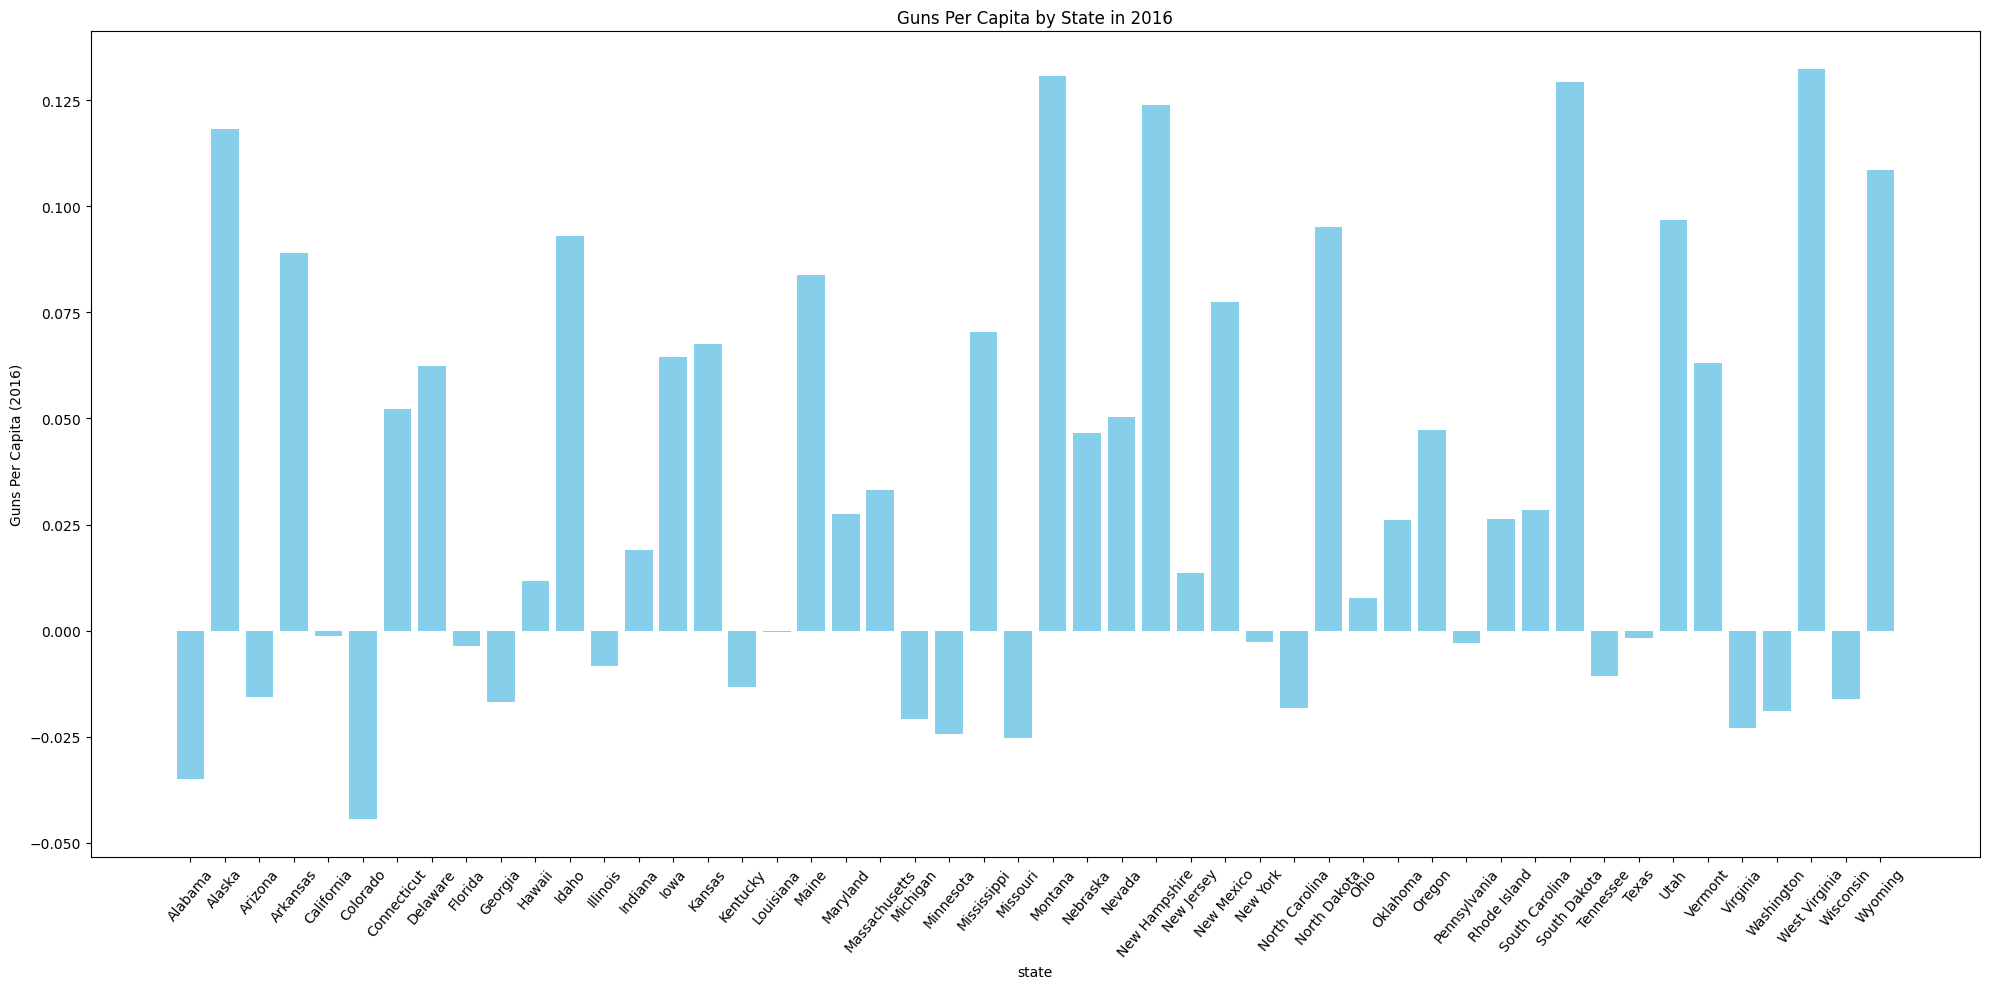

In [261]:
plt.figure(figsize=(20, 10))
plt.bar(result['state'], result['Gun_Per_Capital_2016'], color='skyblue')
plt.xlabel('state')
plt.ylabel('Guns Per Capita (2016)')
plt.title('Guns Per Capita by State in 2016')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

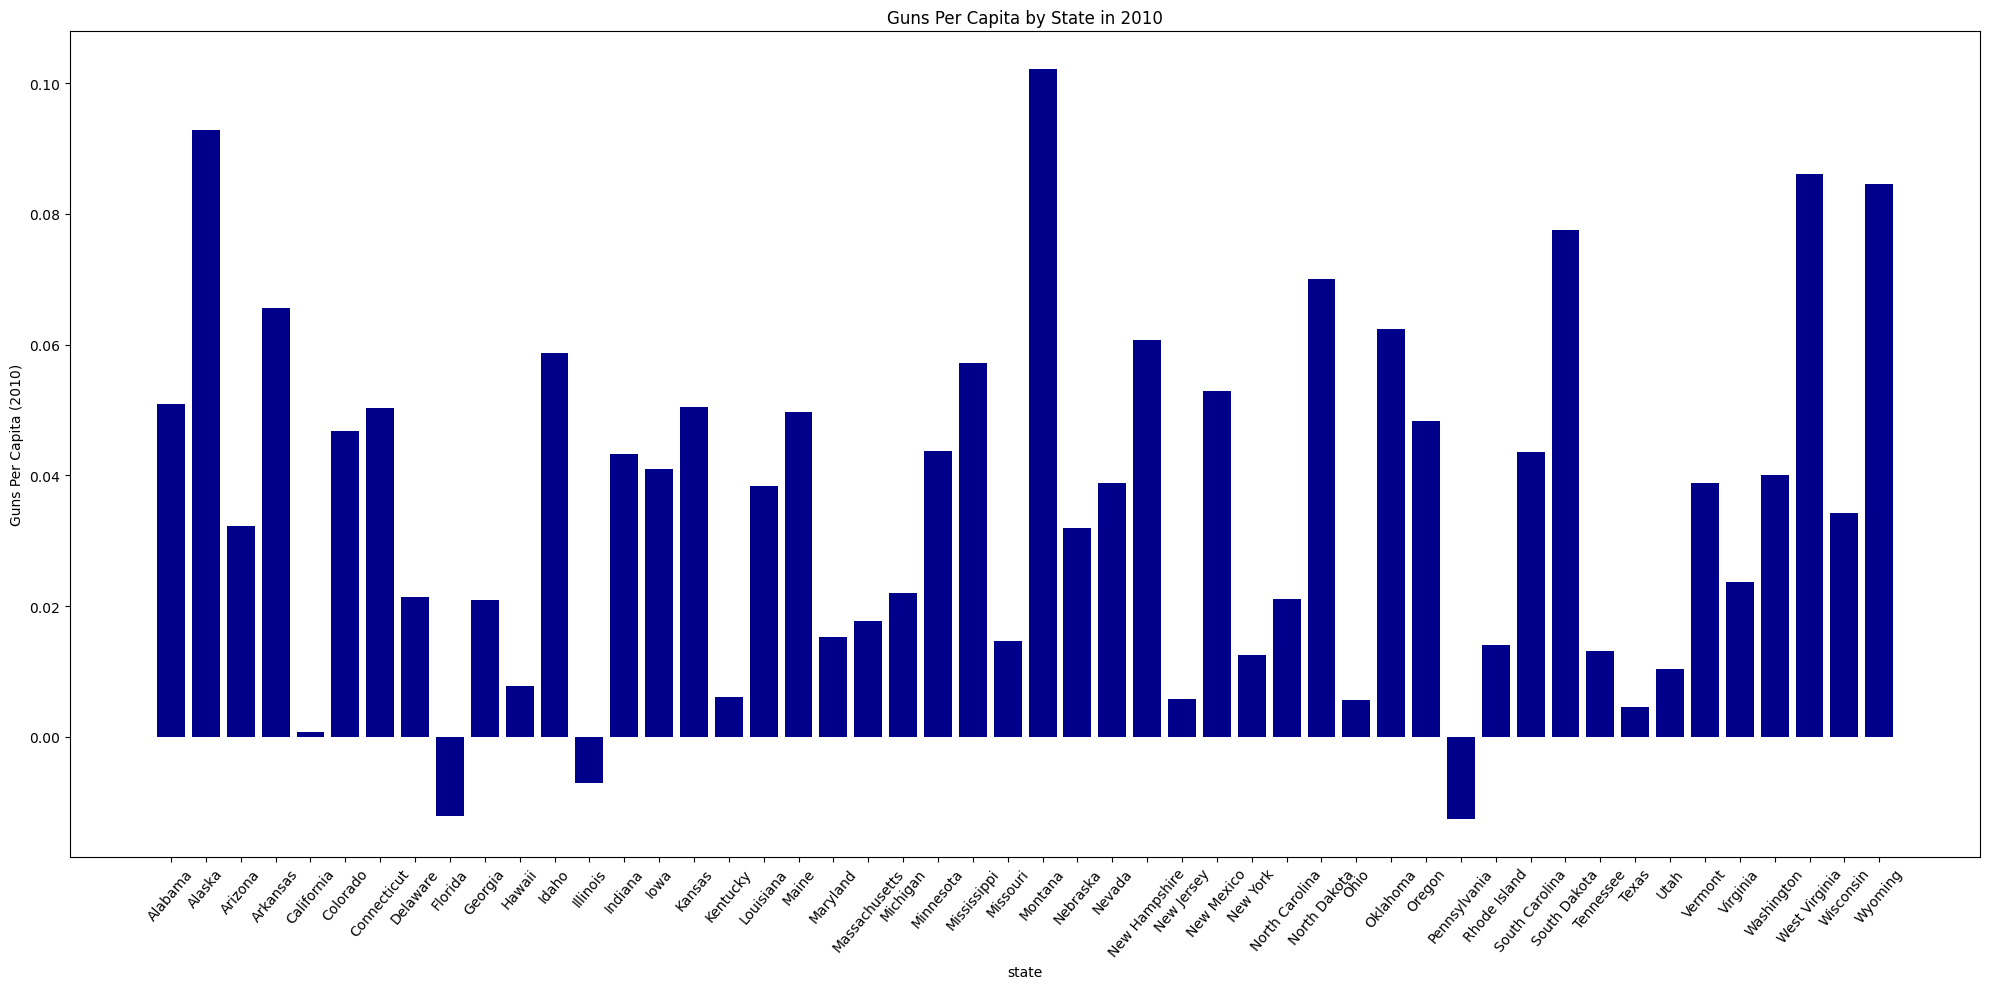

In [262]:
plt.figure(figsize=(20, 10))
plt.bar(result['state'], result['Gun_Per_Capital_2010'], color='darkblue')
plt.xlabel('state')
plt.ylabel('Guns Per Capita (2010)')
plt.title('Guns Per Capita by State in 2010')
plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

**We, can see that in 2010 guns were more varial. In 2016 Access to weapons has declined in more countries than in 2010.**

# Q2: Which states have had the highest growth and the lowest growth in gun registrations ? 

In [263]:
result['growth'] = (result['total_16'] - result['total_10']) / result['total_10']

highest_growth_state = result.loc[result['growth'].idxmax()]
lowest_growth_state = result.loc[result['growth'].idxmin()]

print("Highest Growth State:", highest_growth_state)
print("Lowest Growth State:", lowest_growth_state)

Highest Growth State: state                                                Utah
total_10                                            28846
total_16                                           294907
totals                                            2765409
Population estimates, July 1, 2016,  (V2016)    3051217.0
                                                  ...    
X                                                     NaN
Z                                                     NaN
Gun_Per_Capital_2016                             0.096652
Gun_Per_Capital_2010                             0.010437
growth                                           9.223497
Name: 43, Length: 89, dtype: object
Lowest Growth State: state                                            Kentucky
total_10                                            26283
total_16                                           -58705
totals                                            1647490
Population estimates, July 1, 2016,  (V2016)    443

*Here, Utah is the heighest, and Kentucky state is the lowest*

# 3. What is the overall trend of gun purchases by year or by year and month?

This question ask about the Overall since Nov. 1998 to Septemper 2017.

In [268]:
gun['year'] = pd.to_datetime(gun['year'])

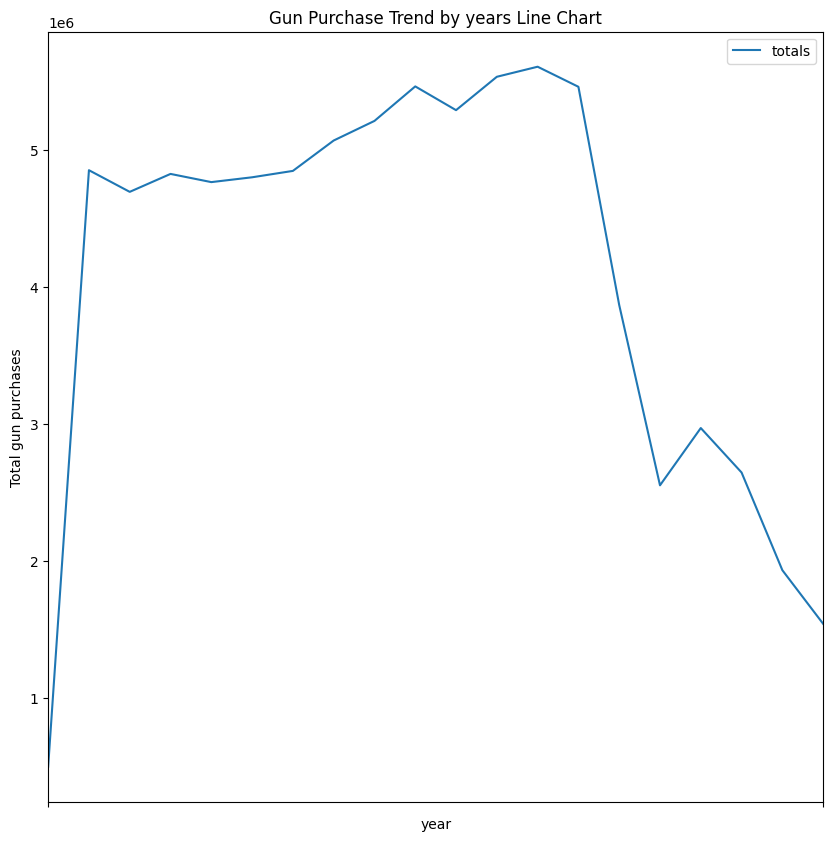

In [270]:
plt.figure(figsize=(10,10))
gun.groupby('year')['totals'].sum().plot(kind='line')

plt.ylabel('Total gun purchases')
plt.xlabel('year')
plt.title("Gun Purchase Trend by years Line Chart")
plt.legend()
plt.show()

In general, we can observe that gun purchases peaked in the 1990s, remained stable for a prolonged period, and then gradually declined until stabilizing once more.

# Conclusion and limitations 

In conclusion, both datasets share similar columns, such as the date and the states columns. 

The top state Utah between 2010 - 2016, and the lowest in 2010-2016 is Kentucky.  
In general, we can observe that gun purchases peaked in the 1990s, remained stable for a prolonged period, and then gradually declined until stabilizing once more.


There were quite few limitations and challenges in both datasets, there ware missing data that might contribute in the analysis accuracy. 

